# Introduction to Pytorch

- One of the most popular framework in ML
- Particularly for research
- More close to idea of computational graph
- Has advantages (better understanding) and disadvantages (more effort)


In [1]:
# Imports
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize, Compose
import os
import matplotlib.pyplot as plt
import numpy as np

# 1 Tensors
- Holding the data
- Similar to NumPy ndarrays


In [2]:
# Creating a tensfor from a list
A = [[6, 9, 2],
     [3, 3, 7],
     [1, 0, 3]]

A_tensor = torch.tensor(A)


In [3]:
# Convert Numpy array into tensor
B = np.array([0,1,2,3])
B_tensor = torch.from_numpy(B)

In [4]:
# Creating a tensor zeros
# with no dtype argument, torch will infer the type
C = torch.zeros(4,4)

C

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [5]:
# creating a 3 dimensional tensor of ones

D = torch.ones(3,3,2, dtype=torch.int)

D

tensor([[[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]]], dtype=torch.int32)

In [6]:
# Create tensor with the same shape as another one and random floating numbers

# the dtype argument allows you to explicitly specify the datatype of the tensor
A_tensor_rand = torch.rand_like(A_tensor, dtype=torch.float)

A_tensor_rand

tensor([[0.3163, 0.8204, 0.9287],
        [0.8104, 0.9635, 0.5755],
        [0.7885, 0.7343, 0.4621]])

In [7]:
# get the attributes of a tensor
print(A_tensor_rand.dtype)

print(A_tensor_rand.shape)

print(A_tensor_rand.device)


torch.float32
torch.Size([3, 3])
cpu


In [8]:
# All very similar to numpy


# 2 Datasets

- PyTorch has a number of datasets included in the package


In [9]:
# Import the necessary library
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [10]:
# Loading Fashion MNIST

import torch
import torchvision
from torchvision.datasets import FashionMNIST # torchvision for image datasets
from torchtext.datasets import AmazonReviewFull # torchtext for text
from torchaudio.datasets import SPEECHCOMMANDS #torchaudio for audio

data_directory = "/content/drive/MyDrive/"

training_data = FashionMNIST(
    # the directory you want to store the dataset, can be a string e.g. "data"
    root = data_directory,
    # if set to False, will give you the test set instead
    train = True,
    # download the dataset if it's not already available in the root path you specified
    download = True,
    # as the name implies, will transform images to tensor data structures so PyTorch can use them for training
    transform = torchvision.transforms.ToTensor()
)

In [11]:
# Looking at the classes of the training dataset
training_data.classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
# get the corresponding index with each class
training_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

# 3 Dataloader Module

- Can easily create minibatches from the dataset

In [13]:
# batch data with batch size 32 and random shuffle
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle = True)


In [14]:
# Check whether GPU is available for GPU training

torch.cuda.is_available()
# True if GPU available

False

In [15]:
# Setting to CUDA ,if GPU is available -otherwise torch uses CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")
# 'cuda'



Device: cpu


- Define a *transform* function
- Use *torchvision.transform.normalize* to training and test set variables
- Takes desired mean and SD as variables
- For Color images should be provided for each R, G, B channel


In [16]:
transform = Compose(
    [ToTensor(),
     Normalize((0.5, 0.5, 0.5),  # mean
               (0.5, 0.5, 0.5))] # std. deviation
)

- Use transform function in transform argument
- Pytorch will apply to entire dataset


In [17]:

training_data = CIFAR10(root="cifar",
                        train = True, # train set, 50k images
                        download = True,
                        transform=transform)
test_data = CIFAR10(root = "cifar",
                    train = False, # test set, 10k images
                    download = True,
                    transform = transform)

100%|██████████| 170498071/170498071 [00:01<00:00, 94549305.51it/s]


Extracting cifar/cifar-10-python.tar.gz to cifar
Files already downloaded and verified


- prepare dataset to get fed into neural network in terms of batches using the PyTorch *DataLoader*

In [18]:
batch_size = 4
train_dataloader = DataLoader(training_data,
                              batch_size=batch_size,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=batch_size,
                             shuffle=True)

*DataLoader* is is an iterabel - take a look at *train_dataloader* by checking out the dimensions of the iteration

In [19]:
for X, y in train_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

  # X is images (4 mini batches, 3 color channels, 32*32 pixesl)
  # y is labels - 4 labels, one per image


Shape of X [N, C, H, W]: torch.Size([4, 3, 32, 32])
Shape of y: torch.Size([4]) torch.int64


In [20]:
# Looking into some examples in our dataset

def imshow(img):
  img = img / 2 + .05 # revert normalization for viewing
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

classes = training_data.classes
training_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

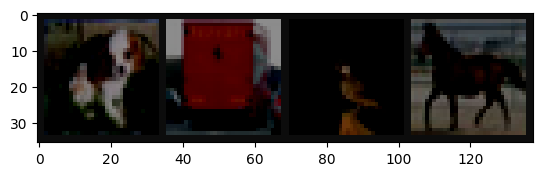

dog   truck bird  horse


In [21]:

dataiter = iter(train_dataloader)
images, labels = next(dataiter)
imshow(make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# 4 Defining a model

- Defining a model class called *NeualNetwork*
- Module will be a subclass of the Pytorch *nn.Module*, base class for all *nn modules* in Pytorch
- Inital model cosists of fully connected layers,  need *nn.Flatten()*
our input image data
- Flatten method will output a linear layer with 3072 (32 * 32 * 3) nodes
- After we define the weights of the model we define a sequence of forward passes
- The forward methods computes an output *tensor* from  and input *tensors*




Note that here, we have some key conceptual differences compared to *Tensorloflow*
- A neural network needs to be instantiated as a subclass of the gerneral class *NeuralNetwork*
- Unless you are using the sequentia method, any layers using weights need to be defined first and then wired together in *forward*


In [22]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

In [23]:
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## 4.1 Loss function and optimizer


- Use Cross-Entropy loss for classification with more than two classes
- For Optimizer will use *torch.optim* package with SGD

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( model.parameters(), lr=0.001 ) # momentum=0.9

## 4.2 Defining the Training loop

- define *train()* function, where we will pass *train_dataloader*, *model*, *loss_fn*, and *optimizer* as arguments during trainig proess
- *model.train()* is a PyTorch *nn.Module* method that sets model to training mode -> this is relevant for certain elements such as dropout, batch norm etc.
- Use *model.eval()* if you want to test the model's performance (evaluation mode)


- The requirement to set the model to trainig and test model is different to Keras/TF
- You must not forget these steps

## 4.3 Backpopagation and Training progress output

- For backprop we need to set  *optimizer.zero_grad()* -> sets gradients to zero before starting backprop
- Otherwise will accumulate gradients over subsequent passes
- *loss.backward()* uses the loss to comput the gradient
- *optimizer.step()* updates the weights

- Note that beyoned the quirck of setting *optimizer.zero_grad()*  the requirements to explicitly do a backward pass *loss.backward()* to generate the gradients and then *optimizer.step()* to update the weights is different from TF-Keras

In [25]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 2000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## 4.5 Defining the testing method


- need to set *model.eval()* to set model into test mode
- and *torch.no_grad()* to disable gradient calculation since we don't use backpropagration during testing
- calculate average loss for the test set and overall accuracy

In [26]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

## 4.6 Training the model


In [27]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.334769  [    0/50000]
loss: 1.928619  [ 8000/50000]
loss: 2.060475  [16000/50000]
loss: 1.413875  [24000/50000]
loss: 1.622860  [32000/50000]
loss: 2.144072  [40000/50000]
loss: 1.726068  [48000/50000]
Test Error: 
 Accuracy: 40.3%, Avg loss: 1.710126 

Epoch 2
-------------------------------
loss: 1.505680  [    0/50000]
loss: 1.659147  [ 8000/50000]
loss: 1.967214  [16000/50000]
loss: 1.295218  [24000/50000]
loss: 1.757917  [32000/50000]
loss: 1.589337  [40000/50000]
loss: 2.155321  [48000/50000]
Test Error: 
 Accuracy: 45.6%, Avg loss: 1.568687 

Epoch 3
-------------------------------
loss: 1.689477  [    0/50000]
loss: 1.133932  [ 8000/50000]
loss: 1.062943  [16000/50000]
loss: 1.376559  [24000/50000]
loss: 1.944252  [32000/50000]
loss: 1.480642  [40000/50000]
loss: 1.711663  [48000/50000]
Test Error: 
 Accuracy: 47.8%, Avg loss: 1.489659 

Epoch 4
-------------------------------
loss: 1.755715  [    0/50000]
loss: 1.335883  [ 8000/5

This tutorial is a close reproduction of the following [blog post](https://towardsdatascience.com/intro-to-pytorch-part-1-663574fb9675)